# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).


### Predict Overview: EA - Twitter Sentiment Classification Challenge
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received. Our task company is to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.




<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. Unseen Data Predictions</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Packages for preprocessing
import re
import contractions
import nltk
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud

# Splitting Data
from sklearn.model_selection import train_test_split

# Packages for hyperparameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

# Vectorize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# classification models
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# Packages for evaluating model accuracy
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score 
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Packages for saving models
import pickle

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the data
df_train =pd.read_csv('https://raw.githubusercontent.com/DN4-CLASSIFICATION-TEAM/Data/main/train.csv',index_col=0)
df_test =pd.read_csv('https://raw.githubusercontent.com/DN4-CLASSIFICATION-TEAM/Data/main/test_with_no_labels.csv',index_col=0)

In [3]:
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)

In [4]:
DF_train = df_train.copy()
DF_test = df_test.copy()

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### 3.1 Previewing the Training and Test Data

In [5]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [6]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


**Listing the Features in the Training and Test Dataset**

In [7]:
print('Table Columns :', list(df_train.columns))

Table Columns : ['sentiment', 'message', 'tweetid']


In [8]:
print('Table Columns :', list(df_test.columns))

Table Columns : ['message', 'tweetid']


**Examining the Information of the Training and Test Dataset**

The information function provides a quick overview of the dataset which highlights importants details such as the number of rows and columns, the null values, the data types of each feature or column, and the memory usage. 

Therefore, we can assess the data quality, identify inconsistent data types, and determine the necessary data preprocessing steps.

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


By examining null values it allows us to assess the data quality, determine how to handle the missing data (in an appropriate manner), and to mitigate any bias as it could reduce the validity and accuracy of the model.

Both our datasets have an interger datatype and an object datatype. Preprocessing steps will be performed on the 'message' columns as text data often contains noise in the form of special characters, punctuation, HTML tags, URLs, and among other unwanted symbols and characters.

**Exploring the 'message' Column**

By isolating the 'message' column we can identify the nature of the text as well as the appropriate preprocessing steps required.

In [11]:
df_train['message'].head()

0    PolySciMajor EPA chief doesn't think carbon di...
1    It's not like we lack evidence of anthropogeni...
2    RT @RawStory: Researchers say we have three ye...
3    #TodayinMaker# WIRED : 2016 was a pivotal year...
4    RT @SoyNovioDeTodas: It's 2016, and a racist, ...
Name: message, dtype: object

**Understanding the Shape of the Training and Test Data**

In [12]:
df_train.shape

(15819, 3)

In [13]:
df_test.shape

(10546, 2)

The data shows that we have 15819 observations and 3 features (columns) in our training dataset. The test dataset contains 10546 observations and 2 features (Columns).

As was stated by under the Data tab of the Kaggle competition, we are meant to have a total of 43 943 tweets for analysis. However, when we add our tweets for train and test data, the total is 26 356 which is 17 557 less than the aforementioned amount. 

The missing data raises a few questions:
1. Was the data intentionally witheld?
2. Are we required to collect our own data?

**Analyzing the 'sentiment' column in the Training Data**

In [14]:
df_train.sentiment.unique()

array([ 1,  2,  0, -1], dtype=int64)

In [15]:
df_train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

We are provided with the sentiment distribution and the range of sentiments represented within the training dataset.

### 3.2 Exploratory Data Analysis: Insights from Visualizations

#### Bar Graph

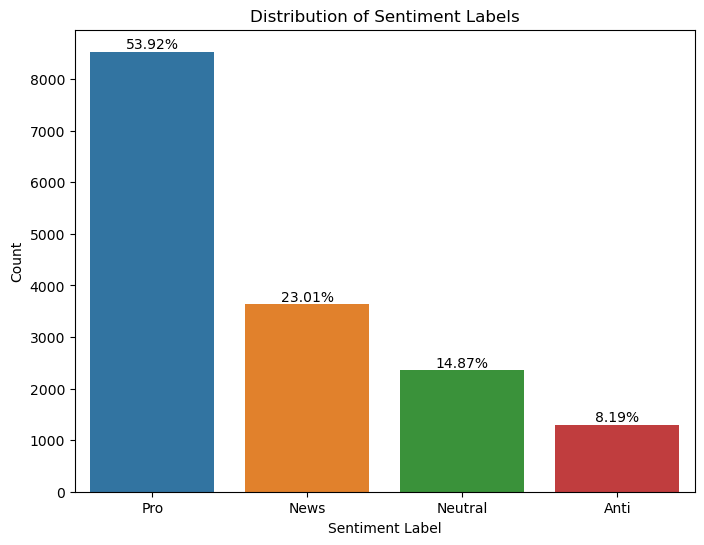

In [16]:
# Mapping sentiment scores to labels
sentiment_labels = {-1: 'Anti', 0: 'Neutral', 1: 'Pro', 2: 'News'}
df_train['sentiment_label'] = df_train['sentiment'].replace(sentiment_labels)

# Calculate the count and percentage for each category
count_data = df_train['sentiment_label'].value_counts()
percentage_data = (count_data / len(df_train)) * 100

# Define the figure size
plt.figure(figsize=(8, 6))  # Adjust the width and height as per your preference

# Plotting the countplot with arranged bars
sns.countplot(x='sentiment_label', data=df_train, order=count_data.index)

# Displaying the plot
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')

# Adding percentages to the plot
for i, count in enumerate(count_data):
    plt.text(i, count, f'{percentage_data[i]:.2f}%', ha='center', va='bottom')

plt.show()

The bar graph depicted above shows the distribution of number of tweets with regards to climate change. The imbalance in the dataset raise a few questions, such as: 

- Does the inherent nature of the topic lead to a higher prevalence of 'Pro' tweets and low occurance of 'Anti' tweets?
- Are people more vocal about topics they strongly believe in? Which could result in a greater representation of 'Pro' and 'News' tweets.
- For those individuals who do not believe in climate change being a man-made cause, are they less inclined to tweet about it or use any other social media platforms to express their views? 

Alternative reasons to for the imbalance in the dataset include:
- Bias in Data Collection (i.e. collected from specific sources or platforms)
- Sampling Bias (was the data randomly selected?)

#### Violin Plot

In [17]:
df_train['message_length'] = df_train['message'].apply(len)
df_test['message_length'] = df_test['message'].apply(len)

Features extraction of the tweet lengths across.

In [18]:
df_train.head()

,sentiment,message,tweetid,sentiment_label,message_length
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,Pro,140
1,1,It's not like we lack evidence of anthropogeni...,126103,Pro,62
2,2,RT @RawStory: Researchers say we have three ye...,698562,News,140
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,Pro,99
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,Pro,122


#### Violin Plot Explanation

1. The white dot represents the median.
2. The thick gray bar in the center represents the interquartile range
3. The thin gray line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.
4. On each side of the gray line is a kernel density estimation to show the distribution shape of the data. Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.

Text(0.5, 0, 'Sentiment Class')

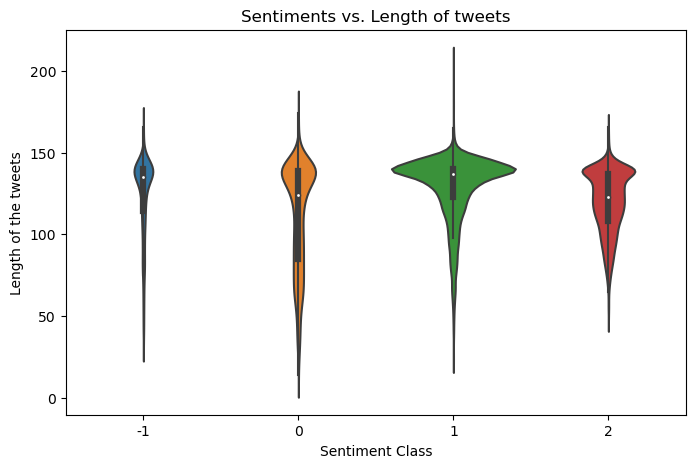

In [19]:
#Create a violinplot of the dataset
plt.figure(figsize=(8,5)) #Set the figsize to 8 and 5 respectively
plt.title('Sentiments vs. Length of tweets') #Add the title of the violin plot
sns.violinplot(x='sentiment', y='message_length', data = df_train,scale='count') #Add the dimentions of the violin plot
plt.ylabel("Length of the tweets") #Y_lable of the plot
plt.xlabel("Sentiment Class") #X_label of the plot

The initial belief was that those individuals who believe that climate change is man-made were expected to have longer tweets (i.e. text length). However, the average tweet length is approximately equal across all sentiments. This could be due to the fact that the tweets are limited to a certain number of characters.

#### Re-Tweets

In [20]:
# Find duplicate messages
df_duplicate = df_train[df_train['message'].duplicated()]

# Print non-unique messages
df_duplicate

,sentiment,message,tweetid,sentiment_label,message_length
51,1,RT @StephenSchlegel: she's thinking about how ...,785499,Pro,146
70,1,"RT @kelkulus: Irony: Florida, a state in dange...",857540,Pro,146
98,1,RT @StephenSchlegel: she's thinking about how ...,603318,Pro,146
112,1,RT @SenSanders: We have a president-elect who ...,664093,Pro,138
122,1,RT @StephenSchlegel: she's thinking about how ...,97375,Pro,146
...,...,...,...,...,...
15781,1,RT @StephenSchlegel: she's thinking about how ...,869993,Pro,146
15799,1,RT @SethMacFarlane: HRC proposes installing ha...,52528,Pro,146
15801,1,RT @SenSanders: On virtually every major issue...,331127,Pro,147
15811,1,RT @StephenSchlegel: she's thinking about how ...,426353,Pro,146


In [21]:
df_duplicate.count()

sentiment          1590
message            1590
tweetid            1590
sentiment_label    1590
message_length     1590
dtype: int64

There are 1590 re-tweets. The act of retweeting generally means that the original tweet resonates with that particular individual. Those who choose to retweet are spreading a message and indicating agreement, support, and/or engagement with the topic. 


We need to prove the hypothesis, that individuals who support the belief that climate change is a man-made result are more vocal about what they believe in, in comparision to those who do not share the same views. 

Let us assess the distribution of the re-tweets in order to determine if the majority were those who belive that climate change is man-made.

In [22]:
df_duplicate['sentiment'].value_counts()

 1    1308
 0     109
 2      98
-1      75
Name: sentiment, dtype: int64

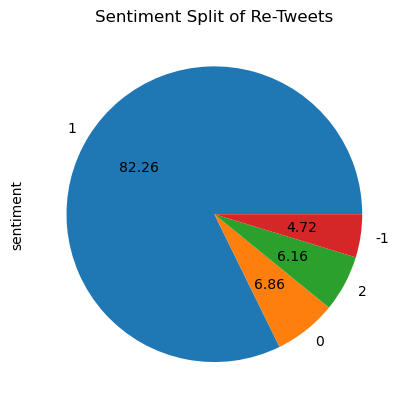

In [23]:
df_duplicate['sentiment'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title("Sentiment Split of Re-Tweets")

plt.show()

This proves the hypothesis that those who believe that climate change is man-made are more likely to tweet, be more vocal and proactive about sharing their views compared to those indivuals that share other sentiments. 

In conculsion, we could be biased to say that more people believe that climate change is man-made.

### 3.3 Cleaning the Training and Test Dataset

#### Removing Duplicates

In [24]:
# Remove duplicate rows based on 'message' column in df_train
initial_rows_train = df_train.shape[0]  # Number of rows before removing duplicates
df_train = df_train.drop_duplicates(subset='message', keep='first').copy()
final_rows_train = df_train.shape[0]  # Number of rows after removing duplicates

# Print the number of rows dropped
print("Number of rows dropped in df_train:", initial_rows_train - final_rows_train)

Number of rows dropped in df_train: 1590


In [25]:
# Display the updated train dataframe
df_train

,sentiment,message,tweetid,sentiment_label,message_length
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,Pro,140
1,1,It's not like we lack evidence of anthropogeni...,126103,Pro,62
2,2,RT @RawStory: Researchers say we have three ye...,698562,News,140
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,Pro,99
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,Pro,122
...,...,...,...,...,...
15813,1,RT @thinkprogress: EPA head falsely claims car...,442853,Pro,140
15814,1,RT @ezlusztig: They took down the material on ...,22001,Pro,140
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,Neutral,133
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,Anti,128


Duplicate entries can become problematic due to number of reasons. While training the model, if an entry appears more than once it will receive a disproportionate weight. Duplicate entries can ruin the split between train, validation, and test sets where identical entries are not all in the same set. This could lead to biased performance estimates that result in disappointing the model in production. Therefore, if a model succeeds on duplicate/frequent entries it gives the impression that it is performing well.

#### Emoji Conversion

In [26]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [27]:
def emoji(text):
    for emoji, word in emojis.items():
        text = text.replace(emoji, word)
    return text

In [28]:
# Apply the emoji function to the 'message' column of the DataFrame
df_train['message'] = df_train['message'].apply(emoji)
df_test['message'] = df_test['message'].apply(emoji)

For the emoji conversion, there is an attempt to locate all emojis (keys) within the tweet text and to replace it with the corresponding value defined in the dictionary that was created. This will replace the emoji with a word before we clean the rest of the noise from the text.

#### Contractions

In [29]:
df_train.loc[:, 'message'] = df_train['message'].apply(lambda x: contractions.fix(x))
df_train['message'] = df_train['message'].apply(lambda x: contractions.fix(x))

df_train.head()

,sentiment,message,tweetid,sentiment_label,message_length
0,1,PolySciMajor EPA chief does not think carbon d...,625221,Pro,140
1,1,It is not like we lack evidence of anthropogen...,126103,Pro,62
2,2,RT @RawStory: Researchers say we have three ye...,698562,News,140
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,Pro,99
4,1,"RT @SoyNovioDeTodas: It is 2016, and a racist,...",466954,Pro,122


In [30]:
df_test.loc[:, 'message'] = df_test['message'].apply(lambda x: contractions.fix(x))
df_test['message'] = df_test['message'].apply(lambda x: contractions.fix(x))

df_test.head()

,message,tweetid,message_length
0,Europe will now be looking to China to make su...,169760,121
1,Combine this with the polling of staffers re c...,35326,132
2,"The scary, unimpeachable evidence that climate...",224985,139
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,136
4,RT @FakeWillMoore: 'Female orgasms because glo...,872928,79


The code is applying the contractions function to the 'message' column of the Training and Test DataFrame, which will expand the contractions in the text.

#### Removing Noise

In [31]:
def remove_noise(text):
    # Replace URLs with "url"
    text = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', 'http', text)

    # Replace Twitter handles with "user"
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags using regular expression
    # text = re.sub(r'#\w+', '', text)

    # Replace special characters with a space
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Convert to lowercase
    text = text.lower()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    return text

In [32]:
# Apply the noise removal function to the 'message' column of the DataFrame
df_train['message'] = df_train['message'].apply(remove_noise)
df_test['message'] = df_test['message'].apply(remove_noise)

#### Tokenize and Lemmatize

In [33]:
# Create an instance of TreebankWordTokenizer
#tokenizer = TreebankWordTokenizer()

# Tokenize the "message" column
df_train['message'] = df_train['message'].apply(lambda x: word_tokenize(x))
df_test['message'] = df_test['message'].apply(lambda x: word_tokenize(x))

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the tokenized words
df_train['message'] = df_train['message'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df_test['message'] = df_test['message'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Join lemmatized list of words
df_train['message'] = df_train['message'].apply(lambda x: ' '.join(x))
df_test['message'] = df_test['message'].apply(lambda x: ' '.join(x))

# Tokenize the "message" column
df_train['token_list'] = df_train['message'].apply(lambda x: word_tokenize(x))
df_test['token_list'] = df_test['message'].apply(lambda x: word_tokenize(x))

In [34]:
df_train.head()

,sentiment,message,tweetid,sentiment_label,message_length,token_list
0,1,polyscimajor epa chief think carbon dioxide ma...,625221,Pro,140,"[polyscimajor, epa, chief, think, carbon, diox..."
1,1,like lack evidence anthropogenic global warming,126103,Pro,62,"[like, lack, evidence, anthropogenic, global, ..."
2,2,rt researcher say three year act climate chang...,698562,News,140,"[rt, researcher, say, three, year, act, climat..."
3,1,todayinmaker wired pivotal year war climate ch...,573736,Pro,99,"[todayinmaker, wired, pivotal, year, war, clim..."
4,1,rt racist sexist climate change denying bigot ...,466954,Pro,122,"[rt, racist, sexist, climate, change, denying,..."


In [35]:
df_test.head()

,message,tweetid,message_length,token_list
0,europe looking china make sure alone fighting ...,169760,121,"[europe, looking, china, make, sure, alone, fi..."
1,combine polling staffer climate change woman r...,35326,132,"[combine, polling, staffer, climate, change, w..."
2,scary unimpeachable evidence climate change al...,224985,139,"[scary, unimpeachable, evidence, climate, chan..."
3,putin got jill trump believe climate change th...,476263,136,"[putin, got, jill, trump, believe, climate, ch..."
4,rt female orgasm global warming sarcastic repu...,872928,79,"[rt, female, orgasm, global, warming, sarcasti..."


### 3.4 Word Cloud: Word Frequency Analysis

#### Word Frequency

In [36]:
word_freq2 = nltk.FreqDist(np.hstack(df_train[df_train['sentiment'] == 2]['token_list']))
word_freq1 = nltk.FreqDist(np.hstack(df_train[df_train['sentiment'] == 1]['token_list']))
word_freq0 = nltk.FreqDist(np.hstack(df_train[df_train['sentiment'] == 0]['token_list']))
word_freqneg1 = nltk.FreqDist(np.hstack(df_train[df_train['sentiment'] == -1]['token_list']))

The purpose of the code provided above is to determine the frequency distribution of the tokens for each of the four sentiment classes. It will help understand which of tokens occur more frequently.

In [37]:
# Get top words for each sentiment
top_words2 = dict(word_freq2.most_common(30))
top_words1 = dict(word_freq1.most_common(30))
top_words0 = dict(word_freq0.most_common(30))
top_wordsneg1 = dict(word_freqneg1.most_common(30))

By creating the "top_words" dictionaries, we can easily access the most frequent words and their frequencies. This information can be used for various purposes, such as analyzing the most important or representative words in each of the four sentiment classes.

#### Plotting the Wordcloud for each Sentiment

In [38]:
# Create word clouds for each sentiment
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words2)
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words1)
wordcloud0 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words0)
wordcloudneg1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_wordsneg1)

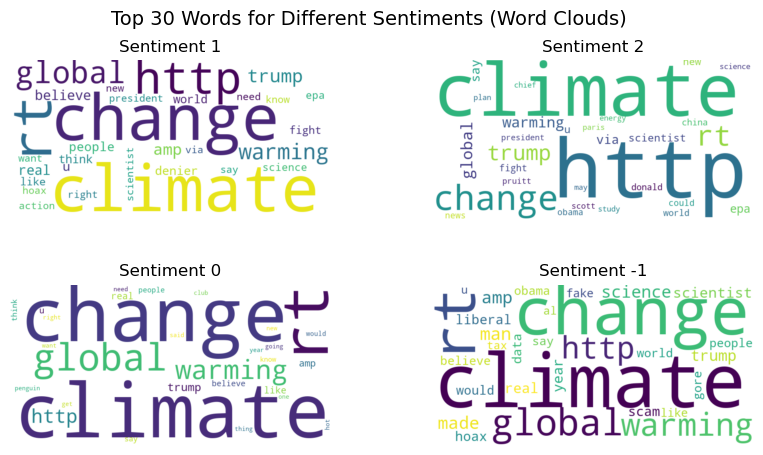

In [39]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Plot word clouds for each sentiment in subplots
axes[0, 0].imshow(wordcloud1, interpolation='bilinear')
axes[0, 0].set_title('Sentiment 1')
axes[0, 0].axis('off')

axes[0, 1].imshow(wordcloud2, interpolation='bilinear')
axes[0, 1].set_title('Sentiment 2')
axes[0, 1].axis('off')

axes[1, 0].imshow(wordcloud0, interpolation='bilinear')
axes[1, 0].set_title('Sentiment 0')
axes[1, 0].axis('off')

axes[1, 1].imshow(wordcloudneg1, interpolation='bilinear')
axes[1, 1].set_title('Sentiment -1')
axes[1, 1].axis('off')

# Adjust spacing
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.suptitle('Top 30 Words for Different Sentiments (Word Clouds)', fontsize=14)
plt.show()

The word cloud, for each sentiment, highlights the most frequent words in each class. By choosing to visually analyze the word clouds, we gain an understanding of the most frequent words depending on the size of the word. There, we are able to determine the common theme associated with each sentiment.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

#### Extracting the common words

In [40]:
# Get the set of common words
common_words = set(top_words1.keys()).intersection(top_words2.keys(), top_words0.keys(), top_wordsneg1.keys())
common_words

{'change', 'climate', 'global', 'http', 'rt', 'say', 'trump', 'u', 'warming'}

In [41]:
def remove_common_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in common_words]
    return ' '.join(filtered_words)

# Step 3: Apply the function to the 'message' column
df_train['No_Common_Words'] = df_train['message'].apply(remove_common_words)
df_test['No_Common_Words'] = df_test['message'].apply(remove_common_words)

In [42]:
df_train.head()

,sentiment,message,tweetid,sentiment_label,message_length,token_list,No_Common_Words
0,1,polyscimajor epa chief think carbon dioxide ma...,625221,Pro,140,"[polyscimajor, epa, chief, think, carbon, diox...",polyscimajor epa chief think carbon dioxide ma...
1,1,like lack evidence anthropogenic global warming,126103,Pro,62,"[like, lack, evidence, anthropogenic, global, ...",like lack evidence anthropogenic
2,2,rt researcher say three year act climate chang...,698562,News,140,"[rt, researcher, say, three, year, act, climat...",researcher three year act late
3,1,todayinmaker wired pivotal year war climate ch...,573736,Pro,99,"[todayinmaker, wired, pivotal, year, war, clim...",todayinmaker wired pivotal year war
4,1,rt racist sexist climate change denying bigot ...,466954,Pro,122,"[rt, racist, sexist, climate, change, denying,...",racist sexist denying bigot leading poll elect...


In [43]:
df_test.head()

,message,tweetid,message_length,token_list,No_Common_Words
0,europe looking china make sure alone fighting ...,169760,121,"[europe, looking, china, make, sure, alone, fi...",europe looking china make sure alone fighting
1,combine polling staffer climate change woman r...,35326,132,"[combine, polling, staffer, climate, change, w...",combine polling staffer woman right fascist state
2,scary unimpeachable evidence climate change al...,224985,139,"[scary, unimpeachable, evidence, climate, chan...",scary unimpeachable evidence already itstimeto...
3,putin got jill trump believe climate change th...,476263,136,"[putin, got, jill, trump, believe, climate, ch...",putin got jill believe think hoax
4,rt female orgasm global warming sarcastic repu...,872928,79,"[rt, female, orgasm, global, warming, sarcasti...",female orgasm sarcastic republican


#### Splitting the Data

In [44]:
X = df_train['message']
y = df_train['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)

Splitting the data is essential for the unbiased evaluation prediction performance where three subsets is considered to be sufficient (i.e. Training, Validation and Test sets). This step is done in order to prevent overfitting.

#### Vectorizer

In [45]:
vectorizer = CountVectorizer().fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

#### Support Vector Machine

In [46]:
SVC = SVC()
SVC.fit(X_train, y_train)

SVC()

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

#### Validation Test Prediction and Classification Report

****Support Vector Machine Report****

In [47]:
y_pred_SVC = SVC.predict(X_test)

print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

          -1       0.81      0.19      0.31       242
           0       0.62      0.27      0.38       443
           1       0.68      0.89      0.77      1451
           2       0.78      0.75      0.77       710

    accuracy                           0.70      2846
   macro avg       0.72      0.53      0.56      2846
weighted avg       0.71      0.70      0.67      2846



#### Report Summary:

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False.

**Precision:** Precision is the ability of a classifier not to label an instance positive that is actually negative. It is defined as the ratio of true positives to the sum of true and false positives.

**Recall (Sensitivity or True Positive Rate):** Recall is the ability of a classifier to find all positive instances. It is defined as the ratio of true positives to the sum of true positives and false negatives.

**F1-score:** The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. The weighted average of F1 should be used to compare classifier models, not global accuracy.

**Support:** Support represents the number of instances in each class.

**Accuracy:** Accuracy measures how accurate the predictions were for the model, calculated as the ratio of correct predictions against the total number of instances.

**Macro Average:** Macro average calculates the average performance across all classes, treating each class equally.

**Weighted Average:** Weighted average calculates the average performance across all classes, weighted by the number of instances in each class.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [48]:
# discuss chosen methods logic

<a id="eight"></a>
## 8. Unseen Data Predictions
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [49]:
X_unseen = df_test['message']

X_unseen_vectorized = vectorizer.transform(X_unseen)

predictions = SVC.predict(X_unseen_vectorized)

In [50]:
daf = pd.DataFrame(predictions, columns=['sentiment'])

daf.head()

,sentiment
0,1
1,1
2,1
3,1
4,0


In [51]:
output = pd.DataFrame({'tweetid':DF_test['tweetid']})

prediction = output.join(daf)

prediction.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


In [52]:
model_save_path = "SVC.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(SVC,file)

In [53]:
model_load_path = "SVC.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)

In [54]:
preds = unpickled_model.predict(X_unseen_vectorized)

In [55]:
preds

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)